# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix

# Importing the data set

We are using the 70,000 grayscale photos in 10 categories from the Fashion MNIST dataset.
10,000 photos will be used to evaluate the model after training with 60,000.
The pixels of the images, which are 28x28 NumPy arrays, range from 0 to 255. An array of integers from 0 to 9 make up the labels. These match the category of clothing that the photograph represents:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_imageData, train_labelData), (test_imageData, test_labelData) = fashion_mnist.load_data()

In [4]:
# Creating class label array
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Analyzing the data

In [5]:
# Shape of training and test data
print(f'Shape of train_imageData: {train_imageData.shape}')
print(f'Shape of train_labelData: {train_labelData.shape}')
print(f'Shape of test_imageData: {test_imageData.shape}')
print(f'Shape of test_labelData: {test_labelData.shape}')

Shape of train_imageData: (60000, 28, 28)
Shape of train_labelData: (60000,)
Shape of test_imageData: (10000, 28, 28)
Shape of test_labelData: (10000,)


In [6]:
# There are 10 labels starting from 0 to 9
print(f'Train labels: {np.unique(train_labelData)}')
print(f'Test labels: {np.unique(test_labelData)}')

Train labels: [0 1 2 3 4 5 6 7 8 9]
Test labels: [0 1 2 3 4 5 6 7 8 9]


# Visualizing the data

In [7]:
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255
train_imageData

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# Images labels(classes) possible values from 0 to 9
train_labelData

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

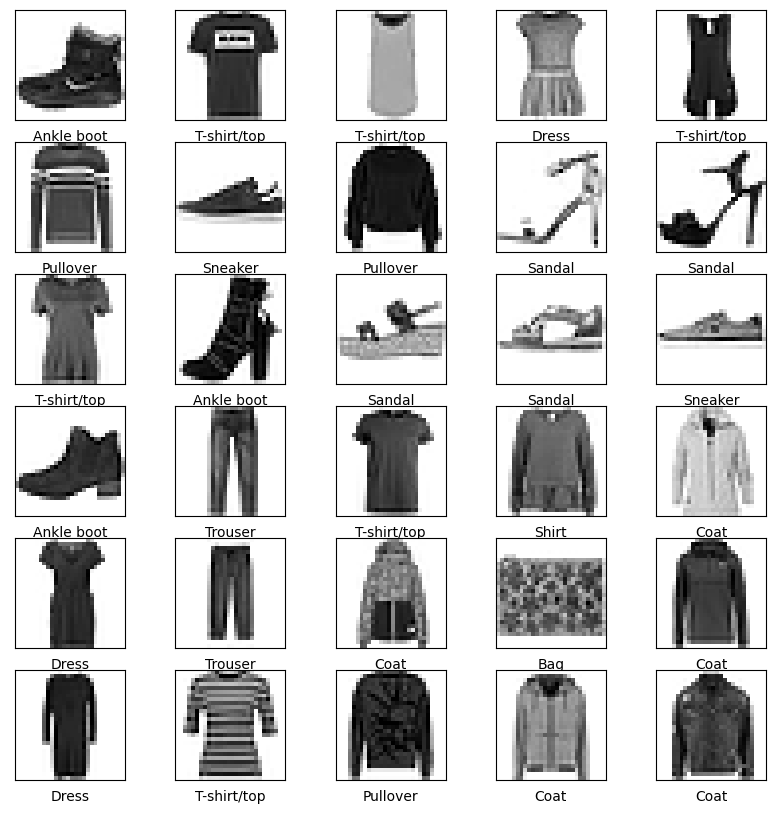

In [9]:
# Display the first 30 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imageData[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labelData[i]])
plt.show()

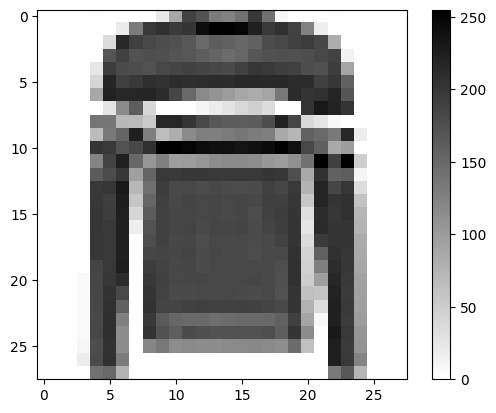

In [10]:
plt.figure()
plt.imshow(train_imageData[5],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Normalizing the Dataset

Each image has pixel values that range from 0 to 255.
Normally, 255 is considered to be white while zero is considered to be black. The many colors of gray are made up of values in between.
We will scale the input by dividing each value by 255 to produce final values that fall between 0 and 1.
Preprocessing the training set and testing set in the same manner is important.

In [11]:
train_imageData = train_imageData / 255.
test_imageData = test_imageData / 255.

# Building the neural network image classifier

The layer is the fundamental component of a neural network. Layers take the data that is provided to them and create representation.
To address a problem, we typically need to chain together several layers.
The format of the images is changed from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels) by the network's first layer, keras.layers.Flatten.
The input layer just reformats the data; it does not aid in any learning.
After flattening the input data, we may build the network with numerous dense hidden layers. Here, two dense layers are being used.
300 nodes make up the first dense layer, which uses the "relu" activation function.

In [12]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax' )])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 286,810
Trainable params: 286,810
Non-trai

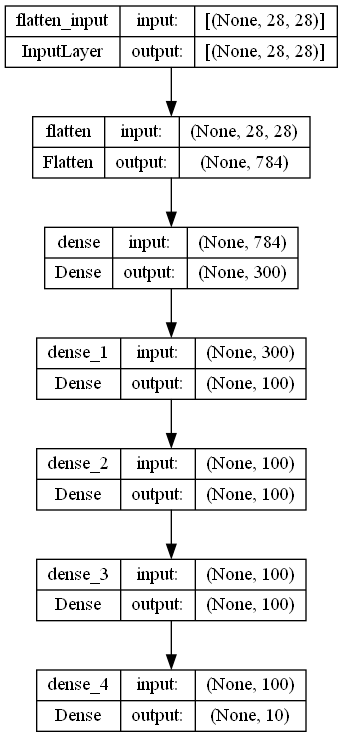

In [27]:
keras.utils.plot_model(model, "fashion_mnist_model.png", show_shapes=True)

# Compiling the model

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

# Training the network

In [31]:
history = model.fit(train_imageData,
                    train_labelData,
                    epochs = 10,
                    )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9460
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1379 - accuracy: 0.9474
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9457
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1329 - accuracy: 0.9503
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9479
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1289 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1305 - accuracy: 0.9514
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9519
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9525
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.121

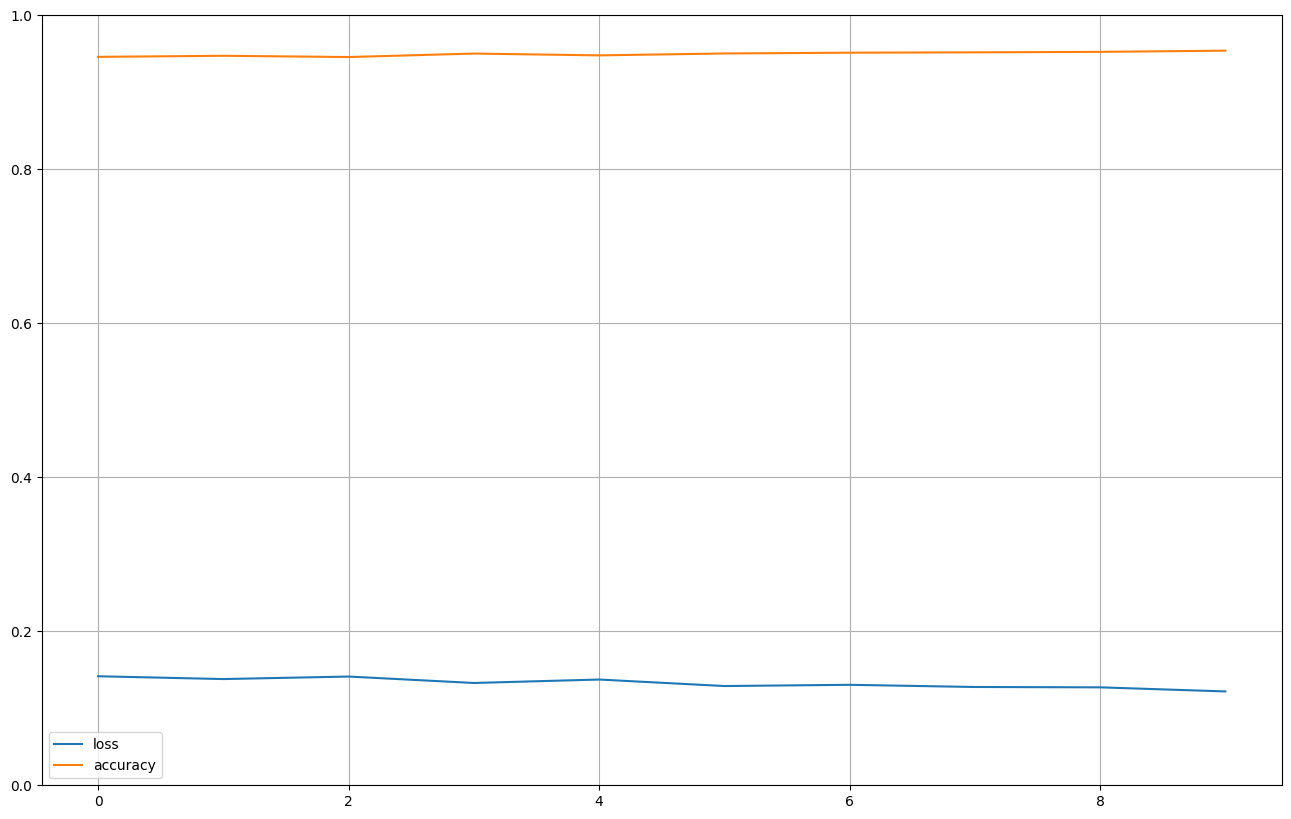

In [32]:
# Plotting previous work

pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_imageData, test_labelData, verbose= 2)
print(f'\nTest accuracy: {test_acc}')
# print(f'\nTest loss: {test_loss}')

313/313 - 0s - loss: 0.5029 - accuracy: 0.8910 - 435ms/epoch - 1ms/step

Test accuracy: 0.890999972820282


# Confusion Matrix

313/313 [==============================] - 1s 2ms/step


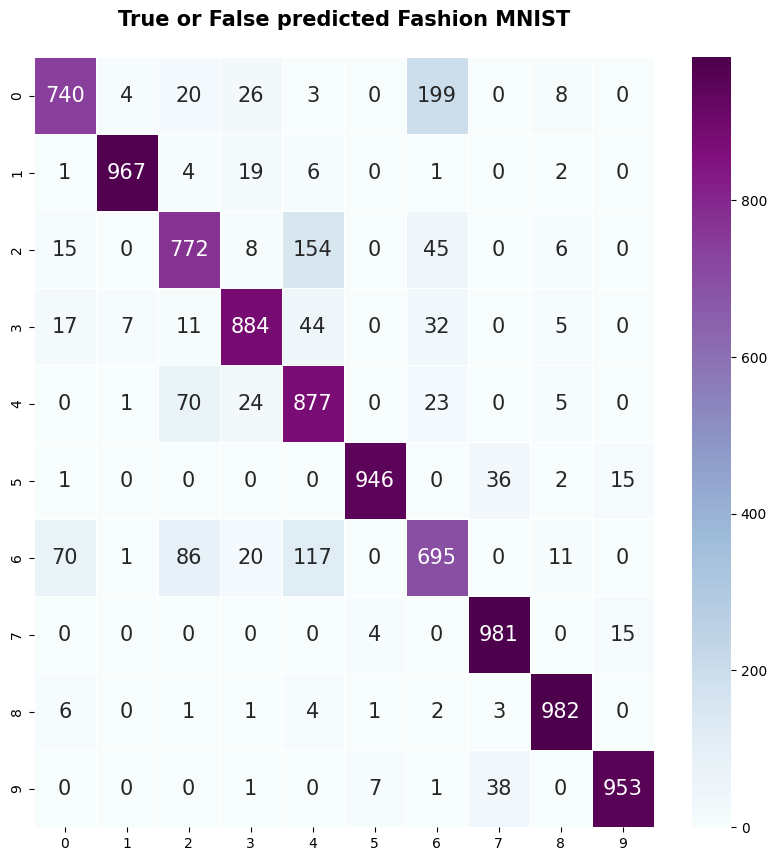

In [19]:
y_predict_fash = model.predict(test_imageData).argmax(axis=1)

#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(test_labelData,y_predict_fash)
plt.figure(figsize=(10,10))
sb.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="BuPu")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

# Predictions

In [34]:
predictions = model.predict(test_imageData)
predictions[43]

313/313 [==============================] - 0s 1ms/step


array([2.7050414e-30, 2.7747189e-38, 5.5376191e-27, 6.9704330e-22,
       2.0958804e-25, 5.8857452e-15, 3.8453917e-20, 1.0000000e+00,
       7.3136956e-25, 1.1513831e-16], dtype=float32)

In [35]:
np.argmax(predictions[43])

7

In [36]:
test_labelData[43]

7

Functions that return prediction, true label along with image.

  """
    This method will plot the true image and also compare the prediction with true values if matcing write the caption in green color else in red color.
    Format is : predicted class %confidence score (true class)
    
    Input:
        i: Index of the prediction to test
        predictions_array: Every prediction contain array of 10 number
        true_label: Correct image labels. In case of test data they are test_labels
        img: Test images. In case of test data they are test_images.
    """

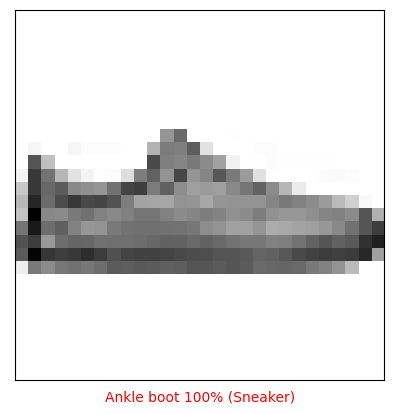

In [23]:
def plot_image(i, predictions_array, true_label, img):
  
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # For grayscale colormap

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
plot_image(12, predictions[0], test_labelData, test_imageData)

 """
    This method will plot the percentage confidence score of each class prediction.
    
    Input:
        i: Index of the prediction to test
        predictions_array: Every prediction contain array of 10 number
        true_label: Correct image labels. In case of test data they are test_labels
    """

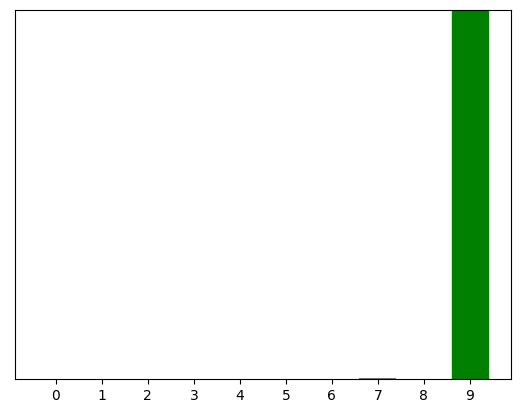

In [24]:
def plot_value_array(i, predictions_array, true_label):
   
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

i = 0
plot_value_array(i, predictions[i],  test_labelData)

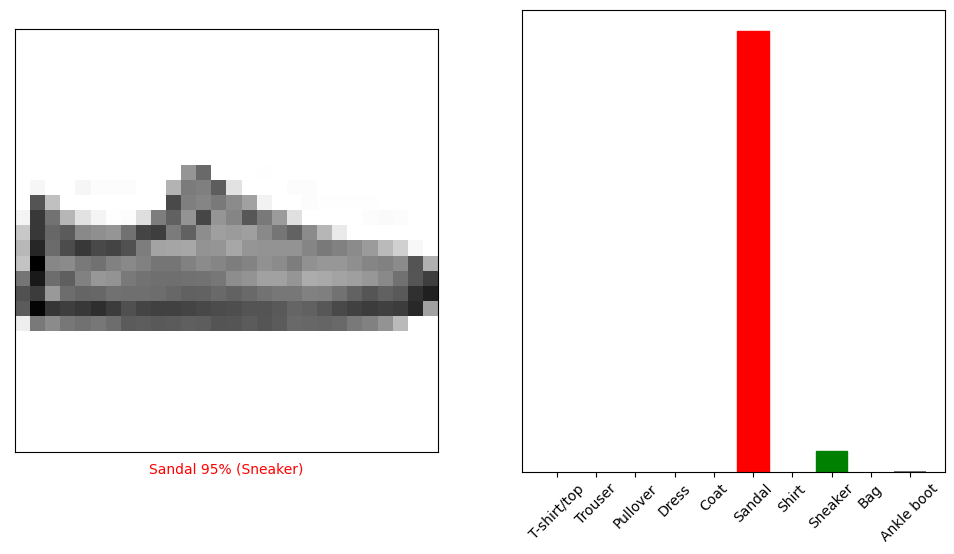

In [25]:
i = 12
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labelData, test_imageData)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labelData)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

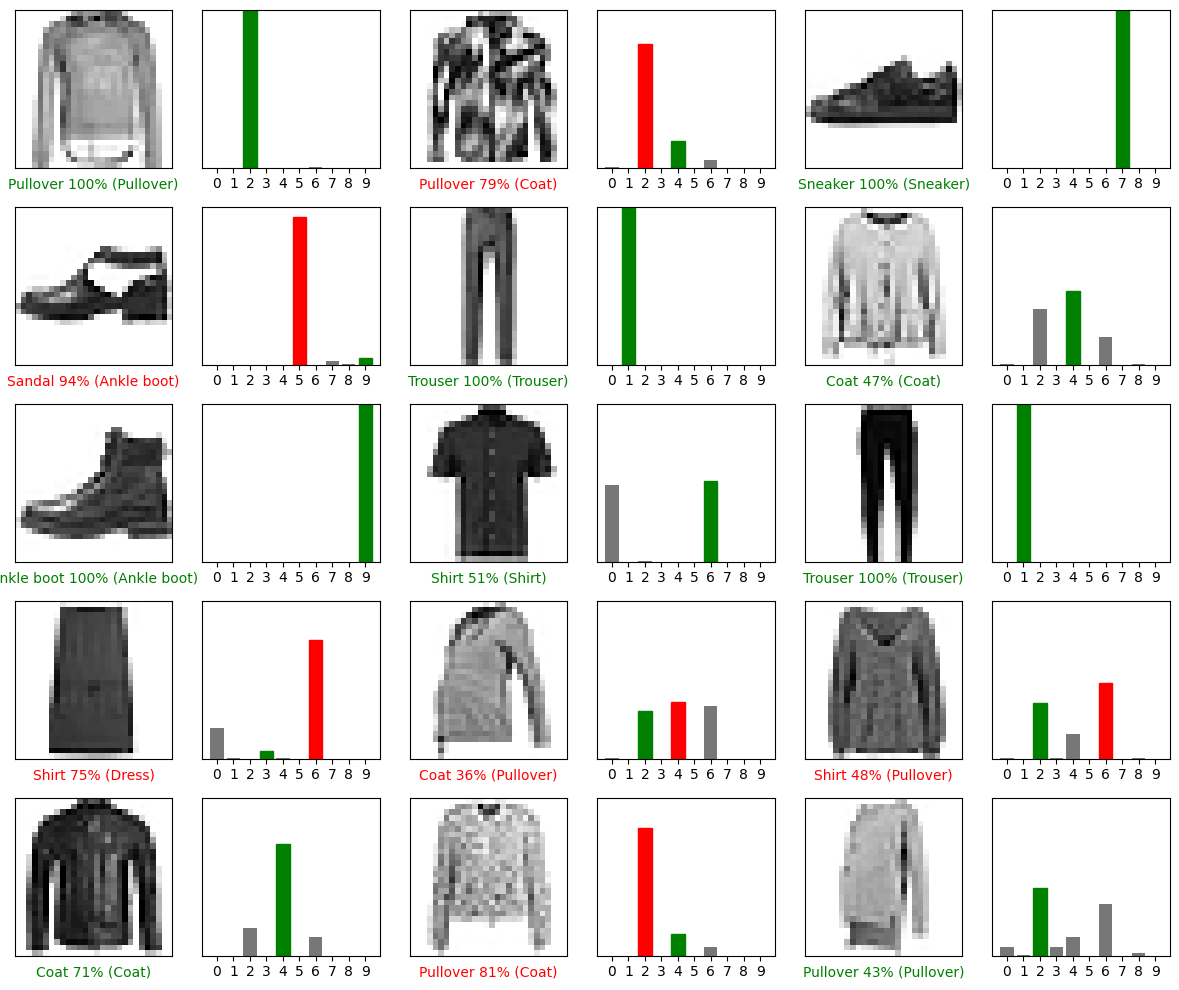

In [26]:
test_list= [16, 17, 22, 23, 24, 25, 39, 40, 41, 42, 48, 49, 50, 51,66]
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(test_list[i], predictions[test_list[i]], test_labelData, test_imageData)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(test_list[i], predictions[test_list[i]], test_labelData)
plt.tight_layout()
plt.show()